In [76]:
from google.colab import drive

In [77]:
drive.mount('/content/drive')                                                   # mounting google drive to the file to access the data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# installing all the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import string
import nltk
from nltk import punkt
import nltk.downloader
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer 
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopWords = set(stopwords.words('english'))

In [ ]:
root_dir = 'drive/My Drive'                                                     # root directory of the dataset
local_path = '/ISOT/'                                                           # folder of the stored ISOT dataset
data_dir = root_dir + local_path


data_path_real = data_dir + 'True.csv'                                          # defined path to the training data for real news
data_path_fake = data_dir + 'Fake.csv'                                          # defined path to the training data for fake news

In [ ]:
train_set_real= pd.read_csv(data_path_real)                                     # reading the csv file for real news content
train_set_real.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [ ]:
train_set_real = train_set_real.assign(label='1')                               # adding label 1 for all news thats real
train_set_real.head(3)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1


In [ ]:
train_set_real.shape

(21417, 5)

In [ ]:
train_set_real.isnull().sum()                                                   # checking for null values in all columns of real news

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
train_set_real.title.duplicated().sum()                                               # checking for duplicated values in all columns of real news

591

In [ ]:
train_set_real.text.duplicated().sum() 

225

In [ ]:
train_set_real.duplicated().sum() 

206

In [ ]:
train_set_real.drop_duplicates()                                                # dropping duplicates in all columns of real news

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
train_set_fake= pd.read_csv(data_path_fake)                                     # reading the csv file for fake news content
train_set_fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [ ]:
train_set_fake = train_set_fake.assign(label='0')                               # adding label 0 for all news thats fake
train_set_fake.head(3)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [ ]:
train_set_fake.shape

(23481, 5)

In [ ]:
train_set_fake.isnull().sum()                                                   # checking for null values in all columns of fake news

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
train_set_fake.title.duplicated().sum()                                               # checking for duplicated values in all columns of fake news

5578

In [ ]:
train_set_fake.text.duplicated().sum()    

6026

In [ ]:
train_set_fake.duplicated().sum()  

3

In [ ]:
train_set_fake.drop_duplicates()                                                # dropping duplicates in all columns of fake news

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
ps=PorterStemmer()
wst= WhitespaceTokenizer() 

In [ ]:
import re

def lower_case (text):
    return text.lower()                                                         # converting text to lower case


def remove_number (text):                                                       # removing numbers from the text corpus
    text_new=""
    for num in text:
        if num.isdigit()==False:
            text_new=text_new+num
    return text_new


def remove_punctutaion(text):                                                   # removing punctuation 
    text_new=''
    for punc in text:
        if punc not in string.punctuation:
            text_new=text_new+punc
    return text_new


def remove_special_characters(text):                                            # Removing special characters
    text_new=''
    for char in text:
        if (char.isalnum()==True) or (char==' '):
            text_new=text_new+char
    return(text_new)


def remove_stopwords(text):                                                     # Removing english stopwords
    text_new=[]
    for word in text.split():
        if word not in stopwords.words('english'):
            text_new.append(word)
    return " ".join(text_new)


def stemming(text):                                                             # Stemming words to root words
    wordlist = word_tokenize(text)
    post_stem = [ps.stem(word) for word in wordlist]
    return ' '.join(post_stem)

 
def remove_whitespace(text):                                                    # Removing extra whitespaces
    return(wst.tokenize(text))


# def remove_url(text):                                                           # removing urls from text 
#   url_pattern = re.compile(r'https?://\S+|www\.\S+')
#   text_new=[]
#   for word in text.split():
#     if word not in url_pattern:
#       text_new.append(word)
#   return " ".join(text_new)


def remove_news_name(x):
    new=[]
    for a in x.split():
        if a not in ('video'):
            new.append(a)

    return " ".join(new)

def compose(f, g):
    return lambda x: f(g(x))

In [ ]:
final=compose(compose(compose(compose(compose(compose(compose(remove_whitespace,stemming),remove_news_name),remove_stopwords),remove_special_characters),remove_punctutaion),remove_number),lower_case)

In [ ]:
real = train_set_real.loc[train_set_real['label'] == '1'].sample(n=21211)        # taking 100% data as sample data from the real news dataset

In [ ]:
real.shape

(21211, 5)

In [ ]:
fake = train_set_fake.loc[train_set_fake['label'] == '0'].sample(n=21211)        # taking almost 100% data as sample data from the fake news dataset to maintain a balanced dataset

In [ ]:
fake.shape

(21211, 5)

In [ ]:
concat_set=pd.concat([real, fake],axis=0)                                       # concatenating both the datasets to make one whole dataset of fake and real news

concat_set.shape

(42422, 5)

In [ ]:
X=concat_set['title']                                                            # selecting feature for detection
Y=concat_set['label']

(x_train, x_test, y_train, y_test) = train_test_split(X, Y, stratify= Y, test_size=0.3,random_state=42, shuffle=True)          # Splitting the data in training an testing data at a 70-30 ratio

In [ ]:
(x_train, x_val, y_train, y_val) = train_test_split(x_train, y_train, stratify= y_train, test_size=0.3,random_state=42, shuffle=True)          # Splitting the data in training an testing data at a 70-30 ratio

In [ ]:
le = preprocessing.LabelEncoder()                                               # transforms non numeric labels to numeric labels

x_train_set = le.fit_transform(x_train)                                         # converts training text to numeric one dimensional array

y_train_set = le.fit_transform(y_train)                                         # converts testing text to numeric one dimensional array

x_train_re = x_train_set.reshape(-1,1)

y_train_re = y_train_set.reshape(-1,1)

In [ ]:
# using CountVectorizer

pipeline1 = Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

pipeline1.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

[[4130  324]
 [ 328 4127]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4454
           1       0.93      0.93      0.93      4455

    accuracy                           0.93      8909
   macro avg       0.93      0.93      0.93      8909
weighted avg       0.93      0.93      0.93      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9581c1690>)

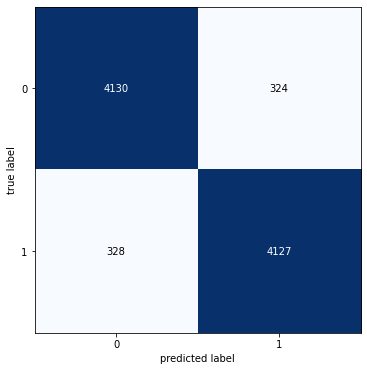

In [ ]:
# predictions based on the Naive Bayes classifier

predictions1=pipeline1.predict(x_val)
cm = confusion_matrix(y_val,predictions1 )
print(confusion_matrix(y_val, predictions1))
print('\n')
print(classification_report(y_val, predictions1))
plot_confusion_matrix(cm, figsize=(6,6))

[[5883  481]
 [ 476 5887]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6364
           1       0.92      0.93      0.92      6363

    accuracy                           0.92     12727
   macro avg       0.92      0.92      0.92     12727
weighted avg       0.92      0.92      0.92     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc957a6cd90>)

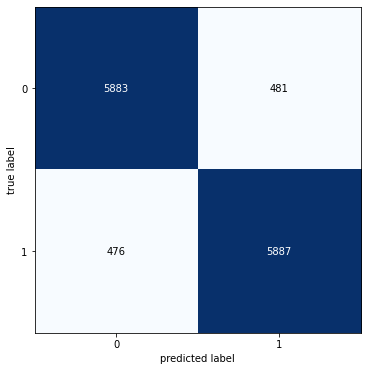

In [ ]:
# predictions based on the Naive Bayes classifier

predictions1=pipeline1.predict(x_test)
cm = confusion_matrix(y_test,predictions1 )
print(confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using TfidfVectorizer

pipeline2=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

pipeline2.fit(x_train,y_train)


Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

[[4125  329]
 [ 338 4117]]


              precision    recall  f1-score   support

           0       0.92      0.93      0.93      4454
           1       0.93      0.92      0.93      4455

    accuracy                           0.93      8909
   macro avg       0.93      0.93      0.93      8909
weighted avg       0.93      0.93      0.93      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9578b04d0>)

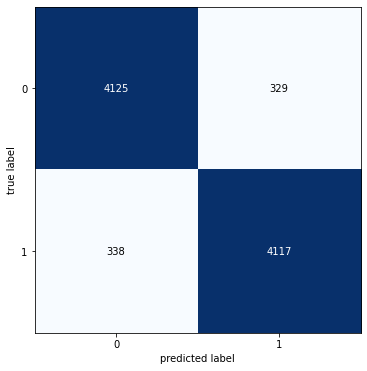

In [ ]:
# predictions based on the Naive Bayes classifier

predictions2=pipeline2.predict(x_val)
cm = confusion_matrix(y_val,predictions2 )
print(confusion_matrix(y_val, predictions2))
print('\n')
print(classification_report(y_val, predictions2))
plot_confusion_matrix(cm, figsize=(6,6))

[[5860  504]
 [ 502 5861]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6364
           1       0.92      0.92      0.92      6363

    accuracy                           0.92     12727
   macro avg       0.92      0.92      0.92     12727
weighted avg       0.92      0.92      0.92     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9578e2650>)

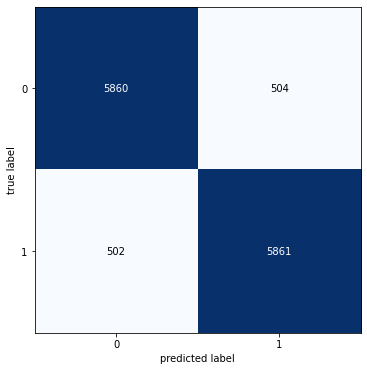

In [ ]:
# predictions based on the Naive Bayes classifier

predictions2=pipeline2.predict(x_test)
cm = confusion_matrix(y_test,predictions2 )
print(confusion_matrix(y_test, predictions2))
print('\n')
print(classification_report(y_test, predictions2))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],}

model = MultinomialNB()
model_selection = GridSearchCV(model, param_grid=params)                        # using gridserachCV for finding the best parameters for the classifier



model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

Best Score:  0.499903776762088
Best Params:  {'alpha': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by GridSearchCV

pipeline3=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB(alpha=0.01))
    ])

pipeline3.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB(alpha=0.01))])

[[4138  316]
 [ 443 4012]]


              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4454
           1       0.93      0.90      0.91      4455

    accuracy                           0.91      8909
   macro avg       0.92      0.91      0.91      8909
weighted avg       0.92      0.91      0.91      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9577feb50>)

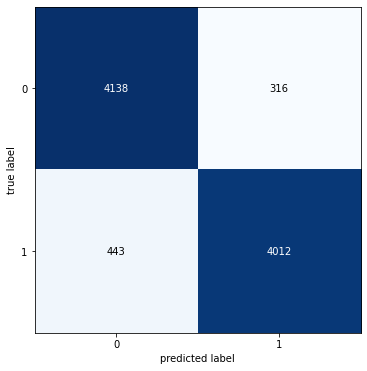

In [ ]:
# predictions based on the Naive Bayes classifier

predictions3=pipeline3.predict(x_val)

cm = confusion_matrix(y_val,predictions3 )
print(confusion_matrix(y_val, predictions3))
print('\n')
print(classification_report(y_val, predictions3))

plot_confusion_matrix(cm, figsize=(6,6))

[[5865  499]
 [ 689 5674]]


              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6364
           1       0.92      0.89      0.91      6363

    accuracy                           0.91     12727
   macro avg       0.91      0.91      0.91     12727
weighted avg       0.91      0.91      0.91     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc957692510>)

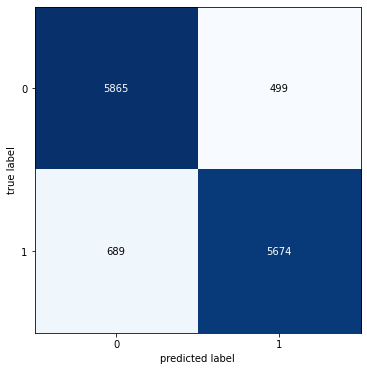

In [ ]:
# predictions based on the Naive Bayes classifier

predictions3=pipeline3.predict(x_test)

cm = confusion_matrix(y_test,predictions3 )
print(confusion_matrix(y_test, predictions3))
print('\n')
print(classification_report(y_test, predictions3))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(alpha =[0.001, 0.01, 0.1, 0.5, 1.0, 10.0,])
model = MultinomialNB()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier


model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(

Best Score:  0.499903776762088
Best Params:  {'alpha': 0.001}


In [ ]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline4=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB(alpha=0.001))
    ])

pipeline4.fit(x_train,y_train)



Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB(alpha=0.001))])

[[4114  340]
 [ 464 3991]]


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4454
           1       0.92      0.90      0.91      4455

    accuracy                           0.91      8909
   macro avg       0.91      0.91      0.91      8909
weighted avg       0.91      0.91      0.91      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9574d2c10>)

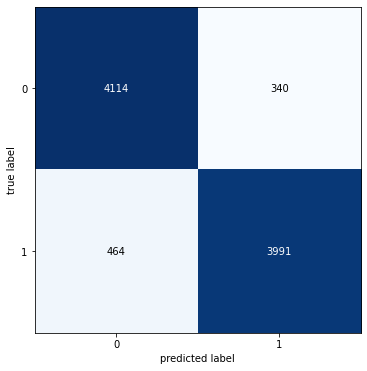

In [ ]:
# predictions based on the Naive Bayes classifier 

predictions4=pipeline4.predict(x_val)
cm = confusion_matrix(y_val,predictions4 )
print(confusion_matrix(y_val, predictions4))
print('\n')
print(classification_report(y_val, predictions4))

plot_confusion_matrix(cm, figsize=(6,6))

[[5839  525]
 [ 715 5648]]


              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6364
           1       0.91      0.89      0.90      6363

    accuracy                           0.90     12727
   macro avg       0.90      0.90      0.90     12727
weighted avg       0.90      0.90      0.90     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9574a08d0>)

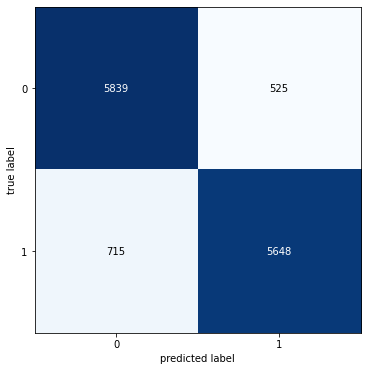

In [ ]:
# predictions based on the Naive Bayes classifier 

predictions4=pipeline4.predict(x_test)
cm = confusion_matrix(y_test,predictions4 )
print(confusion_matrix(y_test, predictions4))
print('\n')
print(classification_report(y_test, predictions4))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
import xgboost as xgb

# using TfidfVectorizer

pipeline5=Pipeline([
    ('vect',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',xgb.XGBClassifier())
    ])

pipeline5.fit(x_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', XGBClassifier())])

[[3064 1390]
 [ 366 4089]]


              precision    recall  f1-score   support

           0       0.89      0.69      0.78      4454
           1       0.75      0.92      0.82      4455

    accuracy                           0.80      8909
   macro avg       0.82      0.80      0.80      8909
weighted avg       0.82      0.80      0.80      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94e344910>)

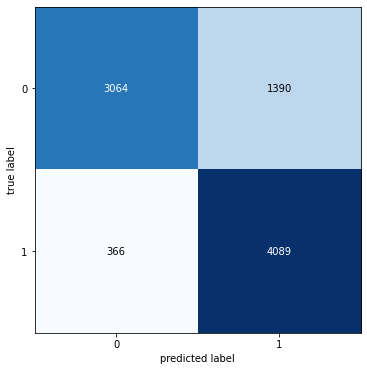

In [ ]:
# predictions based on the XGBoost classifier

predictions5=pipeline5.predict(x_val)

cm = confusion_matrix(y_val,predictions5 )
print(confusion_matrix(y_val, predictions5))
print('\n')
print(classification_report(y_val, predictions5))

plot_confusion_matrix(cm, figsize=(6,6))

[[4313 2051]
 [ 497 5866]]


              precision    recall  f1-score   support

           0       0.90      0.68      0.77      6364
           1       0.74      0.92      0.82      6363

    accuracy                           0.80     12727
   macro avg       0.82      0.80      0.80     12727
weighted avg       0.82      0.80      0.80     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94e2fa090>)

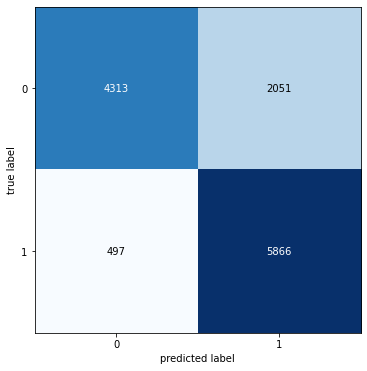

In [ ]:
# predictions based on the XGBoost classifier

predictions5=pipeline5.predict(x_test)

cm = confusion_matrix(y_test,predictions5 )
print(confusion_matrix(y_test, predictions5))
print('\n')
print(classification_report(y_test, predictions5))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using CountVectorizer

pipeline6=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',xgb.XGBClassifier())
    ])

pipeline6.fit(x_train,y_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', XGBClassifier())])

[[3051 1403]
 [ 312 4143]]


              precision    recall  f1-score   support

           0       0.91      0.69      0.78      4454
           1       0.75      0.93      0.83      4455

    accuracy                           0.81      8909
   macro avg       0.83      0.81      0.80      8909
weighted avg       0.83      0.81      0.80      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94e091890>)

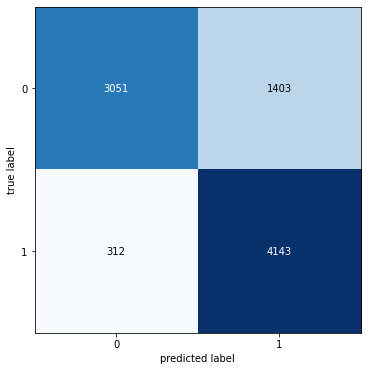

In [ ]:
# predictions based on the XGBoost classifier

predictions6=pipeline6.predict(x_val)

cm = confusion_matrix(y_val,predictions6 )
print(confusion_matrix(y_val, predictions6))
print('\n')
print(classification_report(y_val, predictions6))

plot_confusion_matrix(cm, figsize=(6,6))


[[4296 2068]
 [ 390 5973]]


              precision    recall  f1-score   support

           0       0.92      0.68      0.78      6364
           1       0.74      0.94      0.83      6363

    accuracy                           0.81     12727
   macro avg       0.83      0.81      0.80     12727
weighted avg       0.83      0.81      0.80     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94e04a8d0>)

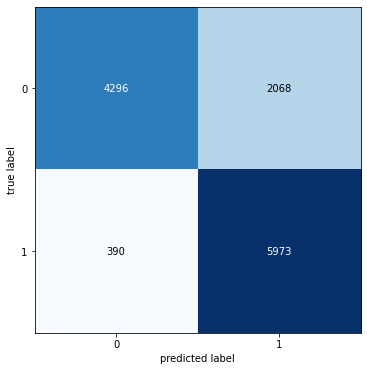

In [ ]:
# predictions based on the XGBoost classifier

predictions6=pipeline6.predict(x_test)

cm = confusion_matrix(y_test,predictions6 )
print(confusion_matrix(y_test, predictions6))
print('\n')
print(classification_report(y_test, predictions6))

plot_confusion_matrix(cm, figsize=(6,6))


In [87]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier


params = {
     'max_depth':[4,5,6],
     'min_child_weight':[4,5,6],
     'gamma':[i/10.0 for i in range(0,5)],
     'subsample':[i/10.0 for i in range(6,10)],
     'colsample_bytree':[i/10.0 for i in range(6,10)]

}


model = XGBClassifier(max_iter=1000)
parameter_selection = GridSearchCV(model, param_grid=params)                    # using gridserachCV for finding the best parameters for the classifier

parameter_selection.fit(x_train_re, y_train_re)
print('Best Score: ', parameter_selection.best_score_) 
print('Best Params: ', parameter_selection.best_params_) 

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected

Best Score:  0.9581449164080871
Best Params:  {'colsample_bytree': 0.6, 'gamma': 0.2, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.9}


In [97]:
# using TfidfVectorizer and Hyper-parameter tuning given by GridSearchCV

pipeline7=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',xgb.XGBClassifier(subsample=0.9, min_child_weight=4, max_depth=6, gama=0.2, colsample_bytree=0.6))
    ])

pipeline7.fit(x_train,y_train)



Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 XGBClassifier(colsample_bytree=0.6, gama=0.2, max_depth=6,
                               min_child_weight=4, subsample=0.9))])

[[3364 1090]
 [ 348 4107]]


              precision    recall  f1-score   support

           0       0.91      0.76      0.82      4454
           1       0.79      0.92      0.85      4455

    accuracy                           0.84      8909
   macro avg       0.85      0.84      0.84      8909
weighted avg       0.85      0.84      0.84      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc949fbca10>)

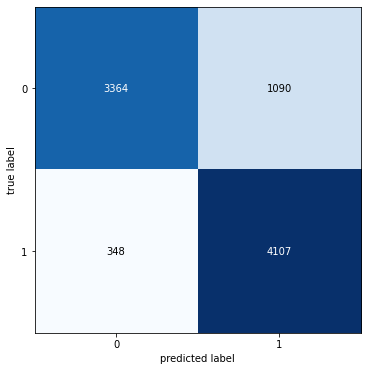

In [98]:
# predictions based on the XGBoost classifier

predictions7=pipeline7.predict(x_val)

cm = confusion_matrix(y_val,predictions7 )
print(confusion_matrix(y_val, predictions7))
print('\n')
print(classification_report(y_val, predictions7))

plot_confusion_matrix(cm, figsize=(6,6))


[[4735 1629]
 [ 463 5900]]


              precision    recall  f1-score   support

           0       0.91      0.74      0.82      6364
           1       0.78      0.93      0.85      6363

    accuracy                           0.84     12727
   macro avg       0.85      0.84      0.83     12727
weighted avg       0.85      0.84      0.83     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94a018310>)

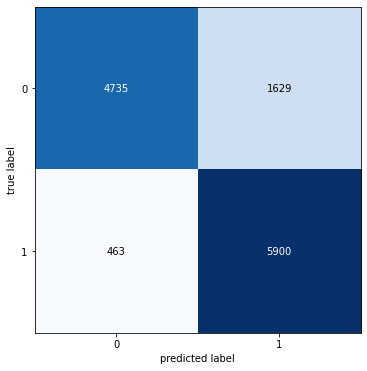

In [99]:
# predictions based on the XGBoost classifier

predictions7=pipeline7.predict(x_test)

cm = confusion_matrix(y_test,predictions7 )
print(confusion_matrix(y_test, predictions7))
print('\n')
print(classification_report(y_test, predictions7))

plot_confusion_matrix(cm, figsize=(6,6))


In [86]:
from xgboost.sklearn import XGBClassifier
distributions = dict(max_depth=[4,5,6], min_child_weight=[4,5,6],  gamma=[i/10.0 for i in range(0,5)], subsample=[i/10.0 for i in range(6,10)], colsample_bytree=[i/10.0 for i in range(6,10)])   
     
model = XGBClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Best Score:  0.9575676001223272
Best Params:  {'subsample': 0.7, 'min_child_weight': 5, 'max_depth': 6, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [88]:
  # using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline8=Pipeline([
    ('bow',TfidfVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',xgb.XGBClassifier(subsample=0.7, min_child_weight=5, max_depth=6, gama=0.1, colsample_bytree=0.7))
    ])

pipeline8.fit(x_train,y_train)

Pipeline(steps=[('bow', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier',
                 XGBClassifier(colsample_bytree=0.7, gama=0.1, max_depth=6,
                               min_child_weight=5, subsample=0.7))])

[[3796  658]
 [ 186 4269]]


              precision    recall  f1-score   support

           0       0.95      0.85      0.90      4454
           1       0.87      0.96      0.91      4455

    accuracy                           0.91      8909
   macro avg       0.91      0.91      0.90      8909
weighted avg       0.91      0.91      0.90      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94a5a4bd0>)

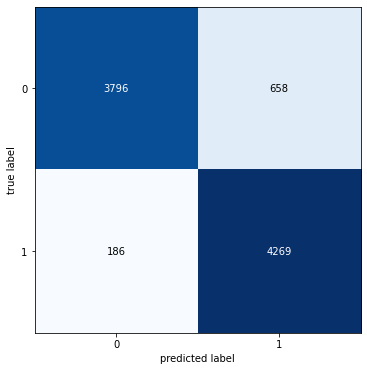

In [89]:
# predictions based on the XGBoost classifier

predictions8=pipeline8.predict(x_val)

cm = confusion_matrix(y_val,predictions8 )
print(confusion_matrix(y_val, predictions8))
print('\n')
print(classification_report(y_val, predictions8))

plot_confusion_matrix(cm, figsize=(6,6))

[[5361 1003]
 [ 257 6106]]


              precision    recall  f1-score   support

           0       0.95      0.84      0.89      6364
           1       0.86      0.96      0.91      6363

    accuracy                           0.90     12727
   macro avg       0.91      0.90      0.90     12727
weighted avg       0.91      0.90      0.90     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94a608650>)

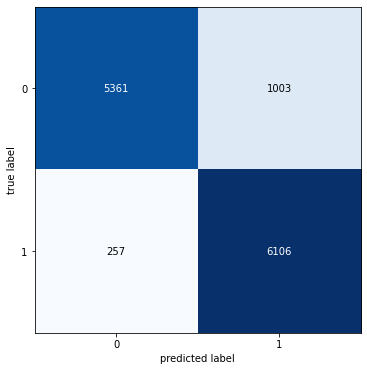

In [90]:
# predictions based on the XGBoost classifier

predictions8=pipeline8.predict(x_test)

cm = confusion_matrix(y_test,predictions8 )
print(confusion_matrix(y_test, predictions8))
print('\n')
print(classification_report(y_test, predictions8))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using CountVectorizer

pipeline9=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

pipeline9.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

[[4032  422]
 [ 339 4116]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4454
           1       0.91      0.92      0.92      4455

    accuracy                           0.91      8909
   macro avg       0.91      0.91      0.91      8909
weighted avg       0.91      0.91      0.91      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94dda1990>)

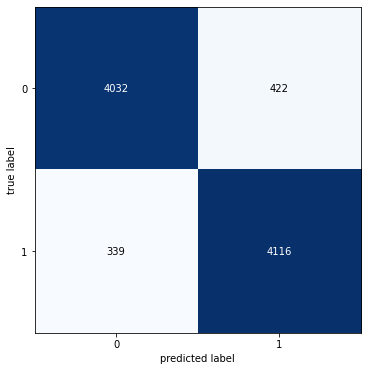

In [ ]:

# predictions based on the Random Forest classifier

predictions9=pipeline9.predict(x_val)

cm = confusion_matrix(y_val,predictions9 )
print(confusion_matrix(y_val, predictions9))
print('\n')
print(classification_report(y_val, predictions9))
plot_confusion_matrix(cm, figsize=(6,6))

[[5764  600]
 [ 465 5898]]


              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6364
           1       0.91      0.93      0.92      6363

    accuracy                           0.92     12727
   macro avg       0.92      0.92      0.92     12727
weighted avg       0.92      0.92      0.92     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94dd6ff50>)

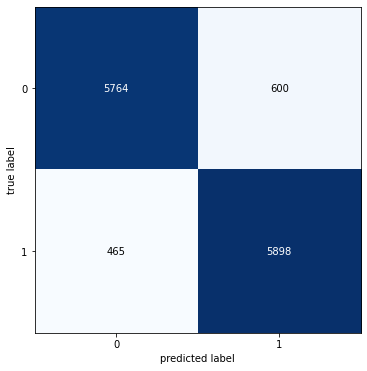

In [ ]:

# predictions based on the Random Forest classifier

predictions9=pipeline9.predict(x_test)

cm = confusion_matrix(y_test,predictions9 )
print(confusion_matrix(y_test, predictions9))
print('\n')
print(classification_report(y_test, predictions9))
plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using TfidfVectorizer

pipeline10=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

pipeline10.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

[[3996  458]
 [ 332 4123]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4454
           1       0.90      0.93      0.91      4455

    accuracy                           0.91      8909
   macro avg       0.91      0.91      0.91      8909
weighted avg       0.91      0.91      0.91      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94dbba790>)

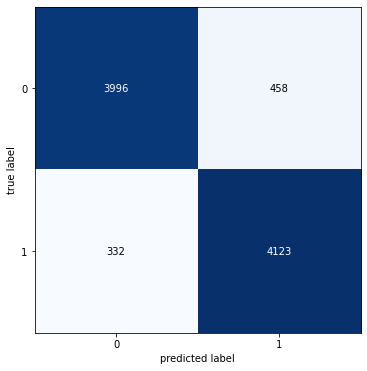

In [ ]:
# predictions based on the Random Forest classifier

predictions10=pipeline10.predict(x_val)


cm = confusion_matrix(y_val,predictions10 )
print(confusion_matrix(y_val, predictions10))
print('\n')
print(classification_report(y_val, predictions10))

plot_confusion_matrix(cm, figsize=(6,6))

[[5728  636]
 [ 477 5886]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6364
           1       0.90      0.93      0.91      6363

    accuracy                           0.91     12727
   macro avg       0.91      0.91      0.91     12727
weighted avg       0.91      0.91      0.91     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94db3e910>)

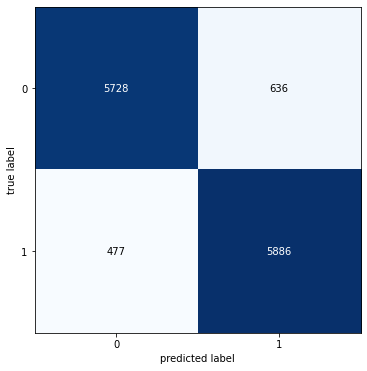

In [ ]:
# predictions based on the Random Forest classifier

predictions10=pipeline10.predict(x_test)


cm = confusion_matrix(y_test,predictions10 )
print(confusion_matrix(y_test, predictions10))
print('\n')
print(classification_report(y_test, predictions10))

plot_confusion_matrix(cm, figsize=(6,6))

In [85]:

params = {
     'n_estimators': [200, 400, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4],
    'criterion' :['gini', 'entropy']
}


model = RandomForestClassifier()
parameter_selection_rfc = GridSearchCV(model, param_grid=params)                # using GridSearchCV for finding the best parameters for the classifier
parameter_selection_rfc.fit(x_train_re, y_train_re)

print('Best Score: ', parameter_selection_rfc.best_score_) 
print('Best Params: ', parameter_selection_rfc.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best Score:  0.805589764791112
Best Params:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


In [91]:
# using TfidfVectorizer and Hyper-parameter tuning given by GridSearchCV

pipeline11=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier(criterion='entropy', max_depth=4, max_features='auto', n_estimators=200))
    ])

pipeline11.fit(x_train,y_train)



Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=4,
                                        n_estimators=200))])

[[3799  655]
 [ 608 3847]]


              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4454
           1       0.85      0.86      0.86      4455

    accuracy                           0.86      8909
   macro avg       0.86      0.86      0.86      8909
weighted avg       0.86      0.86      0.86      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94a5ae810>)

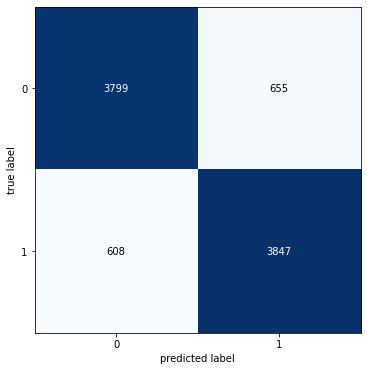

In [92]:
# predictions based on the Random Forest classifier

predictions11=pipeline11.predict(x_val)

cm = confusion_matrix(y_val,predictions11)
print(confusion_matrix(y_val, predictions11))
print('\n')
print(classification_report(y_val, predictions11))

plot_confusion_matrix(cm, figsize=(6,6))

[[5468  896]
 [ 877 5486]]


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      6364
           1       0.86      0.86      0.86      6363

    accuracy                           0.86     12727
   macro avg       0.86      0.86      0.86     12727
weighted avg       0.86      0.86      0.86     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94a4ebf10>)

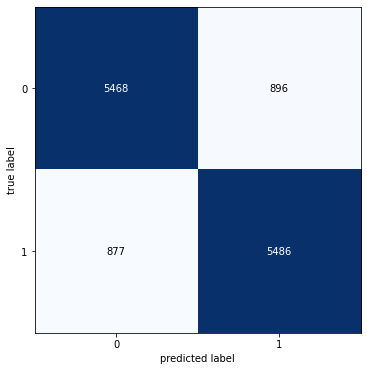

In [93]:
# predictions based on the Random Forest classifier

predictions11=pipeline11.predict(x_test)

cm = confusion_matrix(y_test,predictions11)
print(confusion_matrix(y_test, predictions11))
print('\n')
print(classification_report(y_test, predictions11))

plot_confusion_matrix(cm, figsize=(6,6))

In [84]:
# using RandomizedSearchCV for finding the best parameters for the classifier

distributions = dict(n_estimators =[200, 400, 600], max_features=['auto', 'sqrt', 'log2'], max_depth= [2,3,4], criterion=['gini', 'entropy'])
model = RandomForestClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best Score:  0.8056378764100678
Best Params:  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'entropy'}


In [94]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline12=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier(criterion='entropy', max_depth=4, max_features='auto', n_estimators=200))
    ])

pipeline12.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=4,
                                        n_estimators=200))])

[[3691  763]
 [ 565 3890]]


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4454
           1       0.84      0.87      0.85      4455

    accuracy                           0.85      8909
   macro avg       0.85      0.85      0.85      8909
weighted avg       0.85      0.85      0.85      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94a4a2690>)

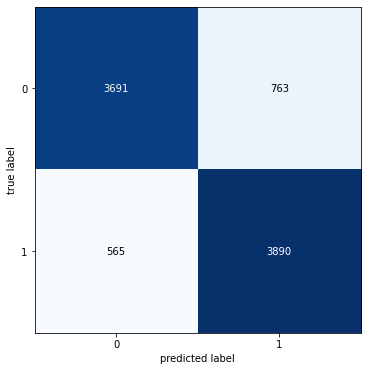

In [95]:
# predictions based on the Random Forest classifier

predictions12=pipeline12.predict(x_val)

cm = confusion_matrix(y_val,predictions12)
print(confusion_matrix(y_val, predictions12))
print('\n')
print(classification_report(y_val, predictions12))

plot_confusion_matrix(cm, figsize=(6,6))

[[5237 1127]
 [ 823 5540]]


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6364
           1       0.83      0.87      0.85      6363

    accuracy                           0.85     12727
   macro avg       0.85      0.85      0.85     12727
weighted avg       0.85      0.85      0.85     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94a337e50>)

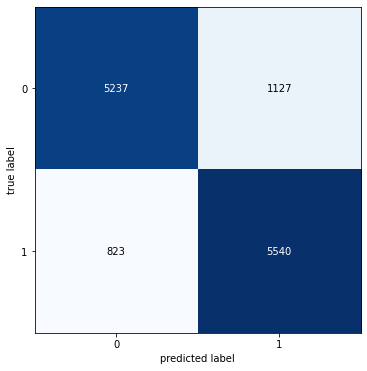

In [96]:
# predictions based on the Random Forest classifier

predictions12=pipeline12.predict(x_test)

cm = confusion_matrix(y_test,predictions12)
print(confusion_matrix(y_test, predictions12))
print('\n')
print(classification_report(y_test, predictions12))

plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using CountVectorizer

pipeline13=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

pipeline13.fit(x_train,y_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

[[4102  352]
 [ 342 4113]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4454
           1       0.92      0.92      0.92      4455

    accuracy                           0.92      8909
   macro avg       0.92      0.92      0.92      8909
weighted avg       0.92      0.92      0.92      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94daf5b90>)

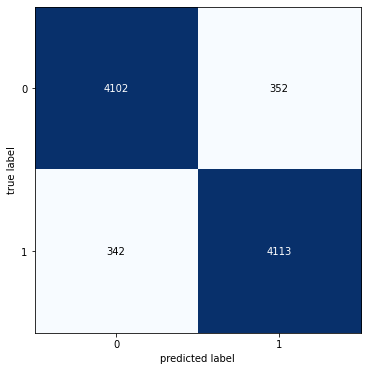

In [ ]:
# predictions based on the Passive Aggressive classifier

predictions13=pipeline13.predict(x_val)

cm = confusion_matrix(y_val,predictions13)
print(confusion_matrix(y_val, predictions13))
print('\n')
print(classification_report(y_val, predictions13))


plot_confusion_matrix(cm, figsize=(6,6))

[[5822  542]
 [ 515 5848]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.92      6364
           1       0.92      0.92      0.92      6363

    accuracy                           0.92     12727
   macro avg       0.92      0.92      0.92     12727
weighted avg       0.92      0.92      0.92     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94d97df10>)

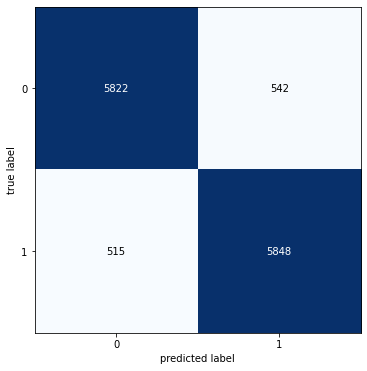

In [ ]:
# predictions based on the Passive Aggressive classifier

predictions13=pipeline13.predict(x_test)

cm = confusion_matrix(y_test,predictions13)
print(confusion_matrix(y_test, predictions13))
print('\n')
print(classification_report(y_test, predictions13))


plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
# using TfidfVectorizer

pipeline14=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])


pipeline14.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

[[4095  359]
 [ 355 4100]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4454
           1       0.92      0.92      0.92      4455

    accuracy                           0.92      8909
   macro avg       0.92      0.92      0.92      8909
weighted avg       0.92      0.92      0.92      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94af70350>)

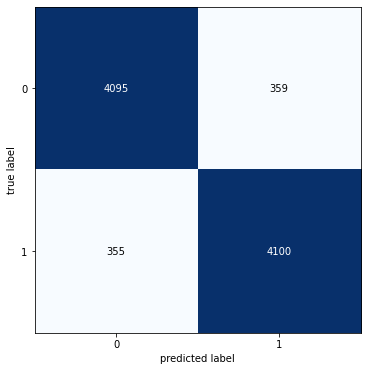

In [ ]:
# predictions based on the Passive Aggressive classifier

predictions14=pipeline14.predict(x_val)

cm = confusion_matrix(y_val,predictions14)
print(confusion_matrix(y_val, predictions14))
print('\n')
print(classification_report(y_val, predictions14))


plot_confusion_matrix(cm, figsize=(6,6))

[[5822  542]
 [ 547 5816]]


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6364
           1       0.91      0.91      0.91      6363

    accuracy                           0.91     12727
   macro avg       0.91      0.91      0.91     12727
weighted avg       0.91      0.91      0.91     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94af71b10>)

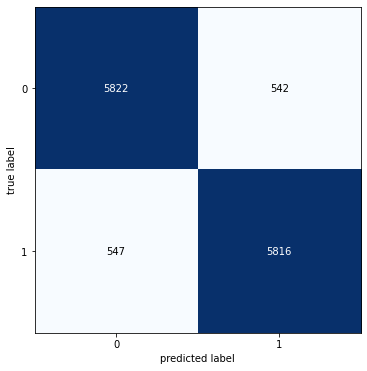

In [ ]:
# predictions based on the Passive Aggressive classifier

predictions14=pipeline14.predict(x_test)

cm = confusion_matrix(y_test,predictions14)
print(confusion_matrix(y_test, predictions14))
print('\n')
print(classification_report(y_test, predictions14))


plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:

params = {
    'C' : [0.003, 0.01, 0.03, 0.1], 
    'loss': ['hinge', 'squared_hinge'], 
    'n_iter_no_change': [5, 10, 30, 100, 300]
}

model = PassiveAggressiveClassifier()
parameter_selection_pac = GridSearchCV(model, param_grid=params)                # using GridSearchCV for finding the best parameters for the classifier
parameter_selection_pac.fit(x_train_re, y_train_re)

print('Best Score: ', parameter_selection_pac.best_score_) 
print('Best Params: ', parameter_selection_pac.best_params_) 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.67679976275117
Best Params:  {'C': 0.01, 'loss': 'squared_hinge', 'n_iter_no_change': 5}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
# using TfidfVectorizer and Hyper-parameter tuning given by GridSearchCV

pipeline15=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier(C=0.01, loss='squared_hinge', n_iter_no_change=5))
    ])

pipeline15.fit(x_train,y_train)


Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 PassiveAggressiveClassifier(C=0.01, loss='squared_hinge'))])

[[4182  272]
 [ 292 4163]]


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4454
           1       0.94      0.93      0.94      4455

    accuracy                           0.94      8909
   macro avg       0.94      0.94      0.94      8909
weighted avg       0.94      0.94      0.94      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94ab6f790>)

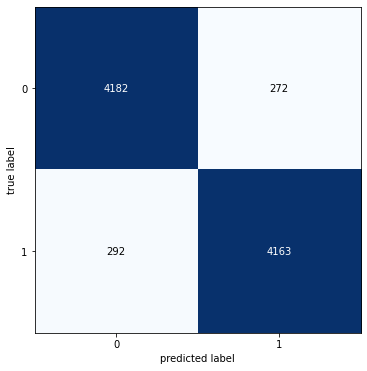

In [82]:
predictions15=pipeline15.predict(x_val)

cm = confusion_matrix(y_val,predictions15)
print(confusion_matrix(y_val, predictions15))
print('\n')
print(classification_report(y_val, predictions15))


plot_confusion_matrix(cm, figsize=(6,6))

[[5953  411]
 [ 425 5938]]


              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6364
           1       0.94      0.93      0.93      6363

    accuracy                           0.93     12727
   macro avg       0.93      0.93      0.93     12727
weighted avg       0.93      0.93      0.93     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94ab5fad0>)

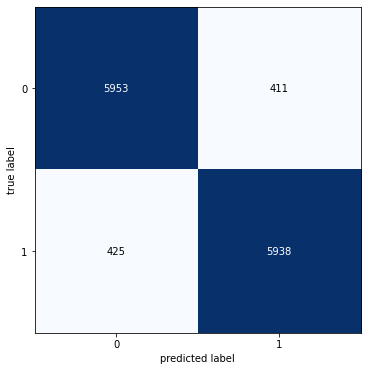

In [83]:
predictions15=pipeline15.predict(x_test)

cm = confusion_matrix(y_test,predictions15)
print(confusion_matrix(y_test, predictions15))
print('\n')
print(classification_report(y_test, predictions15))


plot_confusion_matrix(cm, figsize=(6,6))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# using RandomizedSearchCV for finding the best parameters for the classifier

distributions = dict(C =[0.003, 0.01, 0.03, 0.1],  loss= ['hinge', 'squared_hinge'], n_iter_no_change= [5, 10, 30, 100, 300] )
model = PassiveAggressiveClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.6462997733385032
Best Params:  {'n_iter_no_change': 5, 'loss': 'hinge', 'C': 0.03}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline16=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier(C=0.03, loss='hinge', n_iter_no_change=5))
    ])

pipeline16.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier(C=0.03))])

[[4167  287]
 [ 298 4157]]


              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4454
           1       0.94      0.93      0.93      4455

    accuracy                           0.93      8909
   macro avg       0.93      0.93      0.93      8909
weighted avg       0.93      0.93      0.93      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94adb7150>)

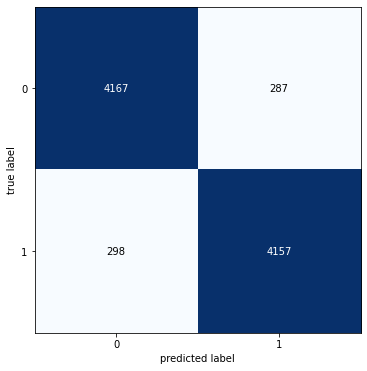

In [79]:
# predictions based on the Passive Aggressive classifier

predictions16=pipeline16.predict(x_val)
cm = confusion_matrix(y_val,predictions16)
print(confusion_matrix(y_val, predictions16))
print('\n')
print(classification_report(y_val   , predictions16))
plot_confusion_matrix(cm, figsize=(6,6))

[[5931  433]
 [ 428 5935]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6364
           1       0.93      0.93      0.93      6363

    accuracy                           0.93     12727
   macro avg       0.93      0.93      0.93     12727
weighted avg       0.93      0.93      0.93     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94ad73090>)

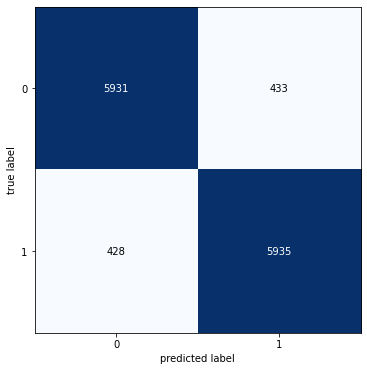

In [80]:
# predictions based on the Passive Aggressive classifier

predictions16=pipeline16.predict(x_test)
cm = confusion_matrix(y_test,predictions16)
print(confusion_matrix(y_test, predictions16))
print('\n')
print(classification_report(y_test, predictions16))
plot_confusion_matrix(cm, figsize=(6,6))

In [100]:
# using CountVectorizer

pipeline17 = Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
    ])

pipeline17.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

[[4133  321]
 [ 304 4151]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4454
           1       0.93      0.93      0.93      4455

    accuracy                           0.93      8909
   macro avg       0.93      0.93      0.93      8909
weighted avg       0.93      0.93      0.93      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94a943590>)

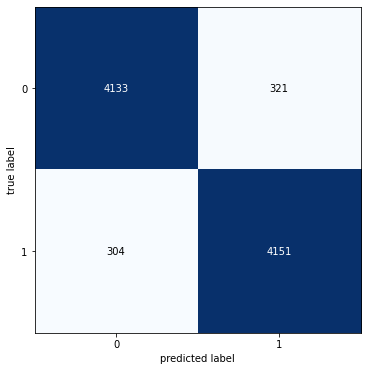

In [101]:
# predictions based on the Logistic Regression  classifier

predictions17=pipeline17.predict(x_val)

cm = confusion_matrix(y_val, predictions17)
print(confusion_matrix(y_val, predictions17))
print('\n')
print(classification_report(y_val, predictions17))
plot_confusion_matrix(cm, figsize=(6,6))

[[5872  492]
 [ 452 5911]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6364
           1       0.92      0.93      0.93      6363

    accuracy                           0.93     12727
   macro avg       0.93      0.93      0.93     12727
weighted avg       0.93      0.93      0.93     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94a334490>)

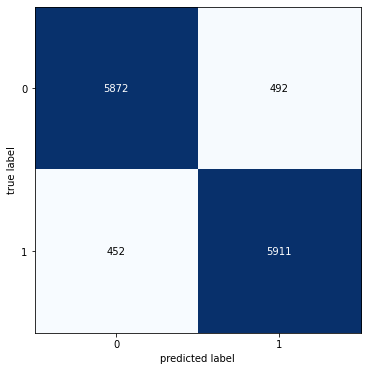

In [102]:
# predictions based on the Logistic Regression  classifier

predictions17=pipeline17.predict(x_test)

cm = confusion_matrix(y_test, predictions17)
print(confusion_matrix(y_test, predictions17))
print('\n')
print(classification_report(y_test, predictions17))
plot_confusion_matrix(cm, figsize=(6,6))

In [103]:
# using TfidfVectorizer

pipeline18=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
    ])

pipeline18.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

[[4160  294]
 [ 301 4154]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4454
           1       0.93      0.93      0.93      4455

    accuracy                           0.93      8909
   macro avg       0.93      0.93      0.93      8909
weighted avg       0.93      0.93      0.93      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc949d51ed0>)

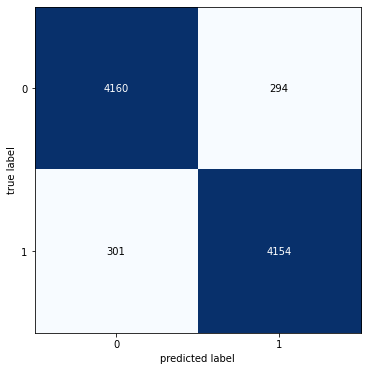

In [104]:
# predictions based on the Naive Bayes classifier

predictions18=pipeline18.predict(x_val)
cm = confusion_matrix(y_val, predictions18)
print(confusion_matrix(y_val, predictions18))
print('\n')
print(classification_report(y_val, predictions18))
plot_confusion_matrix(cm, figsize=(6,6))

[[5925  439]
 [ 443 5920]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6364
           1       0.93      0.93      0.93      6363

    accuracy                           0.93     12727
   macro avg       0.93      0.93      0.93     12727
weighted avg       0.93      0.93      0.93     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc949cc6b90>)

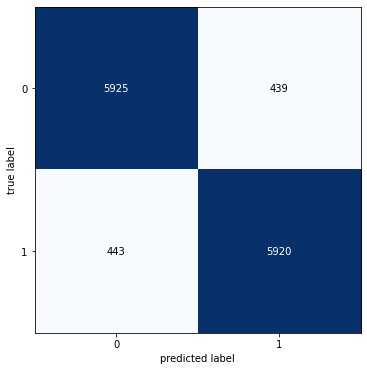

In [105]:
# predictions based on the Naive Bayes classifier

predictions18=pipeline18.predict(x_test)
cm = confusion_matrix(y_test, predictions18)
print(confusion_matrix(y_test, predictions18))
print('\n')
print(classification_report(y_test, predictions18))
plot_confusion_matrix(cm, figsize=(6,6))

In [106]:
from sklearn.model_selection import GridSearchCV

params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'penalty': ['l1', 'l2', 'elasticnet', 'none'] }
model = LogisticRegression()
model_selection = GridSearchCV(model, param_grid=params)                        # using gridserachCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.689502398811997
Best Params:  {'penalty': 'l2', 'solver': 'liblinear'}


In [116]:
# using TfidfVectorizer and Hyper-parameter tuning given by GridSearchCV

pipeline19=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression(penalty='l2', solver='liblinear'))
    ])

pipeline19.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression(solver='liblinear'))])

[[4160  294]
 [ 301 4154]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4454
           1       0.93      0.93      0.93      4455

    accuracy                           0.93      8909
   macro avg       0.93      0.93      0.93      8909
weighted avg       0.93      0.93      0.93      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9496ce450>)

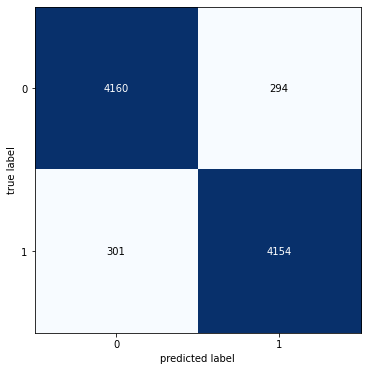

In [117]:
# predictions based on the Naive Bayes classifier

predictions19=pipeline19.predict(x_val)
cm = confusion_matrix(y_val, predictions19)
print(confusion_matrix(y_val, predictions19))
print('\n')
print(classification_report(y_val, predictions19))
plot_confusion_matrix(cm, figsize=(6,6))

[[5924  440]
 [ 442 5921]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6364
           1       0.93      0.93      0.93      6363

    accuracy                           0.93     12727
   macro avg       0.93      0.93      0.93     12727
weighted avg       0.93      0.93      0.93     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9496ab2d0>)

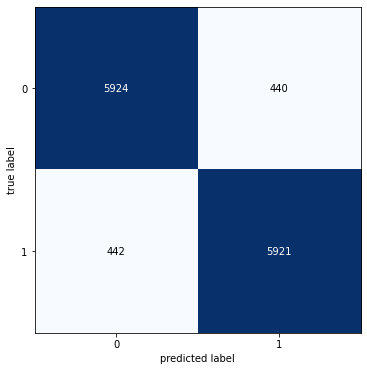

In [118]:
# predictions based on the Naive Bayes classifier

predictions19=pipeline19.predict(x_test)
cm = confusion_matrix(y_test, predictions19)
print(confusion_matrix(y_test, predictions19))
print('\n')
print(classification_report(y_test, predictions19))
plot_confusion_matrix(cm, figsize=(6,6))

In [107]:
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(solver= ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], penalty= ['l1', 'l2', 'elasticnet', 'none'])
model = LogisticRegression()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.6620798520966912
Best Params:  {'solver': 'liblinear', 'penalty': 'l1'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/lin

In [119]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline20=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression(solver='liblinear', penalty='l1'))
    ])

pipeline20.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

[[4069  385]
 [ 360 4095]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4454
           1       0.91      0.92      0.92      4455

    accuracy                           0.92      8909
   macro avg       0.92      0.92      0.92      8909
weighted avg       0.92      0.92      0.92      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9494e1990>)

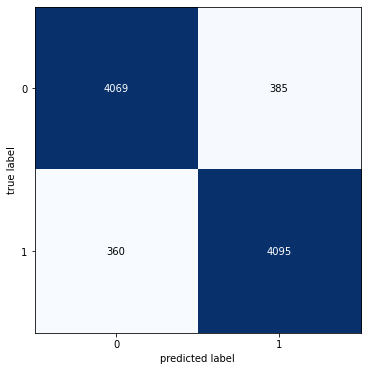

In [120]:
# predictions based on the Logitistic Regression classifier

predictions20=pipeline20.predict(x_val)
cm = confusion_matrix(y_val, predictions20)
print(confusion_matrix(y_val, predictions20))
print('\n')
print(classification_report(y_val, predictions20))
plot_confusion_matrix(cm, figsize=(6,6))

[[5785  579]
 [ 511 5852]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.91      6364
           1       0.91      0.92      0.91      6363

    accuracy                           0.91     12727
   macro avg       0.91      0.91      0.91     12727
weighted avg       0.91      0.91      0.91     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9494d0f10>)

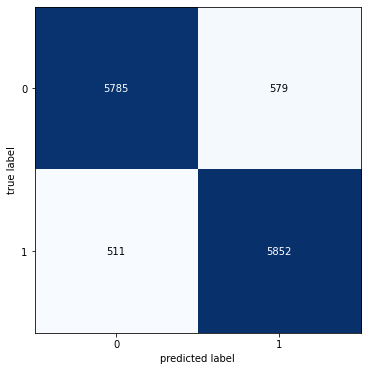

In [121]:
# predictions based on the Logitistic Regression classifier

predictions20=pipeline20.predict(x_test)
cm = confusion_matrix(y_test, predictions20)
print(confusion_matrix(y_test, predictions20))
print('\n')
print(classification_report(y_test, predictions20))
plot_confusion_matrix(cm, figsize=(6,6))

In [108]:
# using CountVectorizer

pipeline21 = Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SGDClassifier())
    ])

pipeline21.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier())])

[[4134  320]
 [ 274 4181]]


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4454
           1       0.93      0.94      0.93      4455

    accuracy                           0.93      8909
   macro avg       0.93      0.93      0.93      8909
weighted avg       0.93      0.93      0.93      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc949ae83d0>)

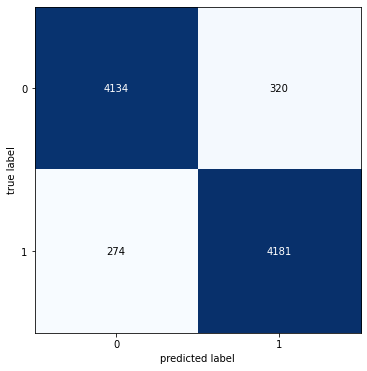

In [109]:
# predictions based on the Naive Bayes classifier

predictions21=pipeline21.predict(x_val)
cm = confusion_matrix(y_val, predictions21)
print(confusion_matrix(y_val, predictions21))
print('\n')
print(classification_report(y_val, predictions21))
plot_confusion_matrix(cm, figsize=(6,6))

[[5880  484]
 [ 413 5950]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6364
           1       0.92      0.94      0.93      6363

    accuracy                           0.93     12727
   macro avg       0.93      0.93      0.93     12727
weighted avg       0.93      0.93      0.93     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc949a4f450>)

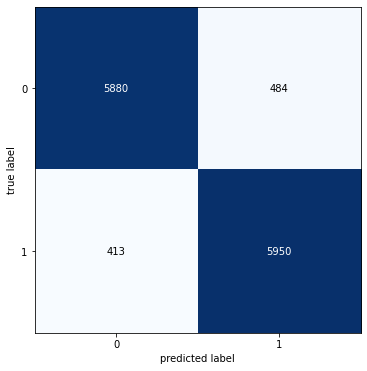

In [110]:
# predictions based on the Naive Bayes classifier

predictions21=pipeline21.predict(x_test)
cm = confusion_matrix(y_test, predictions21)
print(confusion_matrix(y_test, predictions21))
print('\n')
print(classification_report(y_test, predictions21))
plot_confusion_matrix(cm, figsize=(6,6))

In [111]:
# using TfidfVectorizer

pipeline22=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SGDClassifier())
    ])

pipeline22.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier())])

[[4154  300]
 [ 279 4176]]


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4454
           1       0.93      0.94      0.94      4455

    accuracy                           0.94      8909
   macro avg       0.94      0.94      0.94      8909
weighted avg       0.94      0.94      0.94      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9498c3b50>)

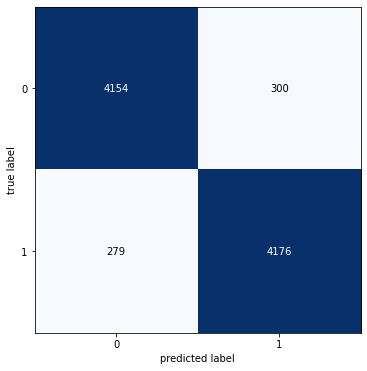

In [112]:
# predictions based on the Naive Bayes classifier

predictions22=pipeline22.predict(x_val)

cm = confusion_matrix(y_val, predictions22)
print(confusion_matrix(y_val, predictions22))
print('\n')
print(classification_report(y_val, predictions22))
plot_confusion_matrix(cm, figsize=(6,6))

[[5928  436]
 [ 401 5962]]


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6364
           1       0.93      0.94      0.93      6363

    accuracy                           0.93     12727
   macro avg       0.93      0.93      0.93     12727
weighted avg       0.93      0.93      0.93     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9498dafd0>)

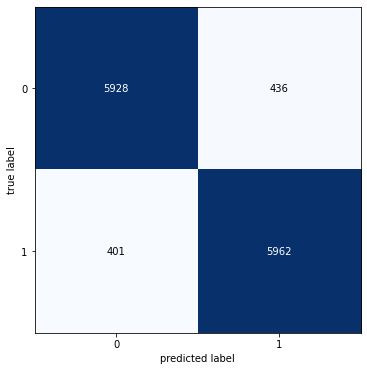

In [113]:
# predictions based on the Naive Bayes classifier

predictions22=pipeline22.predict(x_test)

cm = confusion_matrix(y_test, predictions22)
print(confusion_matrix(y_test, predictions22))
print('\n')
print(classification_report(y_test, predictions22))
plot_confusion_matrix(cm, figsize=(6,6))

In [114]:
from sklearn.model_selection import GridSearchCV

params = {'loss' : ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge' ],
          'penalty': ['l1', 'l2', 'elasticnet', 'none']}

model = SGDClassifier()
model_selection = GridSearchCV(model, param_grid=params)                        # using gridserachCV for finding the best parameters for the classifier


model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5799513630641849
Best Params:  {'loss': 'hinge', 'penalty': 'none'}


In [122]:
# using TfidfVectorizer and Hyper-parameter tuning given by GridSearchCV

pipeline23=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SGDClassifier(loss= 'hinge', penalty='none'))
    ])

pipeline23.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier(penalty='none'))])

[[4116  338]
 [ 347 4108]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4454
           1       0.92      0.92      0.92      4455

    accuracy                           0.92      8909
   macro avg       0.92      0.92      0.92      8909
weighted avg       0.92      0.92      0.92      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc949640350>)

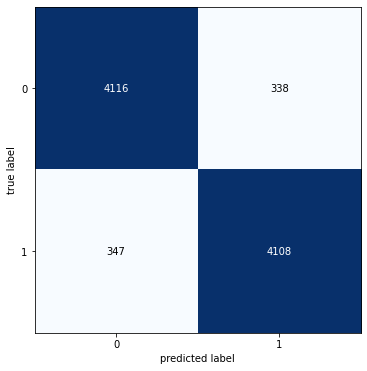

In [123]:
# predictions based on the Naive Bayes classifier
predictions23=pipeline23.predict(x_val)

cm = confusion_matrix(y_val, predictions23)
print(confusion_matrix(y_val, predictions23))
print('\n')
print(classification_report(y_val, predictions23))

plot_confusion_matrix(cm, figsize=(6,6))

[[5859  505]
 [ 473 5890]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6364
           1       0.92      0.93      0.92      6363

    accuracy                           0.92     12727
   macro avg       0.92      0.92      0.92     12727
weighted avg       0.92      0.92      0.92     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc949304ad0>)

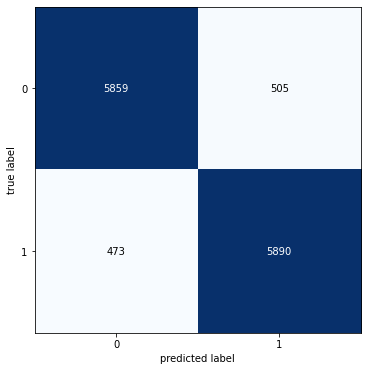

In [124]:
# predictions based on the Naive Bayes classifier
predictions23=pipeline23.predict(x_test)

cm = confusion_matrix(y_test, predictions23)
print(confusion_matrix(y_test, predictions23))
print('\n')
print(classification_report(y_test, predictions23))

plot_confusion_matrix(cm, figsize=(6,6))

In [115]:
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(loss= ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge' ],
          penalty = ['l1', 'l2', 'elasticnet', 'none'])
model = SGDClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5585509724552303
Best Params:  {'penalty': 'l2', 'loss': 'squared_hinge'}


In [125]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline24=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SGDClassifier(penalty= 'l2', loss='squared_hinge'))
    ])

pipeline24.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fc9590d6710>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier(loss='squared_hinge'))])

[[4041  413]
 [ 454 4001]]


              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4454
           1       0.91      0.90      0.90      4455

    accuracy                           0.90      8909
   macro avg       0.90      0.90      0.90      8909
weighted avg       0.90      0.90      0.90      8909



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9490a0650>)

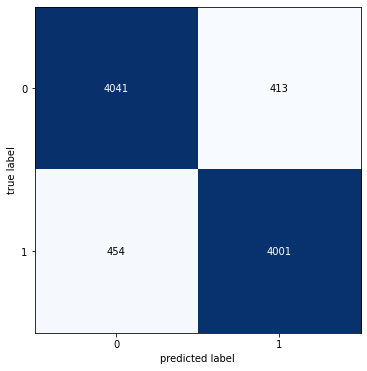

In [126]:
# predictions based on the Naive Bayes classifier 

predictions24=pipeline24.predict(x_val)

cm = confusion_matrix(y_val, predictions24)
print(confusion_matrix(y_val, predictions24))
print('\n')
print(classification_report(y_val, predictions24))

plot_confusion_matrix(cm, figsize=(6,6))

[[5744  620]
 [ 593 5770]]


              precision    recall  f1-score   support

           0       0.91      0.90      0.90      6364
           1       0.90      0.91      0.90      6363

    accuracy                           0.90     12727
   macro avg       0.90      0.90      0.90     12727
weighted avg       0.90      0.90      0.90     12727



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc9490ff810>)

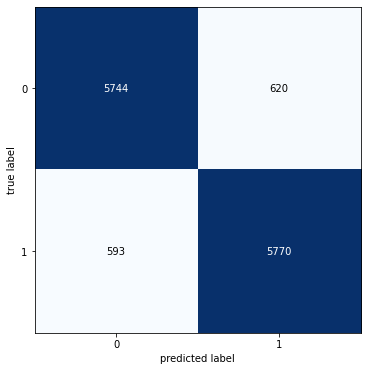

In [127]:
# predictions based on the Naive Bayes classifier 

predictions24=pipeline24.predict(x_test)

cm = confusion_matrix(y_test, predictions24)
print(confusion_matrix(y_test, predictions24))
print('\n')
print(classification_report(y_test, predictions24))

plot_confusion_matrix(cm, figsize=(6,6))